# **Librerias**

In [ ]:
from keras.datasets import cifar10
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random

# **Base de datos**

In [ ]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

# **Grafica base de datos**

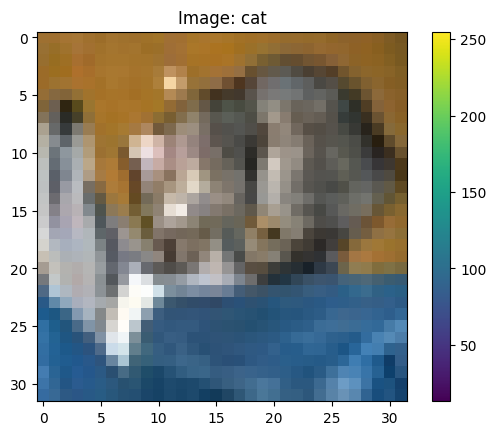

Dimensiones de las imágenes en CIFAR-10: (32, 32, 3)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


index = 0

image = X_test[index]
label = Y_test[index][0]

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.title(f'Image: {class_names[label]}')
plt.show()

image_shape = X_test.shape[1:]
print("Dimensiones de las imágenes en CIFAR-10:", image_shape)


# **Red neuronal**

In [ ]:
X_train = X_train.reshape(50000, 3072)
X_test = X_test.reshape(10000, 3072)

classes = 10
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

input_size = 3072
batch_size = 100
epochs = 10

model = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
500/500 [==============================] - 4s 5ms/step - loss: 2.1885 - accuracy: 0.1714 - val_loss: 2.1129 - val_accuracy: 0.1973
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 2.0556 - accuracy: 0.2283 - val_loss: 2.0241 - val_accuracy: 0.2349
Epoch 3/10
500/500 [==============================] - 2s 5ms/step - loss: 1.9896 - accuracy: 0.2629 - val_loss: 1.9693 - val_accuracy: 0.2839
Epoch 4/10
500/500 [==============================] - 2s 5ms/step - loss: 1.9375 - accuracy: 0.2928 - val_loss: 1.9066 - val_accuracy: 0.3085
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 1.8947 - accuracy: 0.3109 - val_loss: 1.8974 - val_accuracy: 0.3124
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 1.8627 - accuracy: 0.3238 - val_loss: 1.8256 - val_accuracy: 0.3426
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 1.8348 - accuracy: 0.3345 - val_loss: 1.8387 - val_accuracy: 0.3338
Epoch 

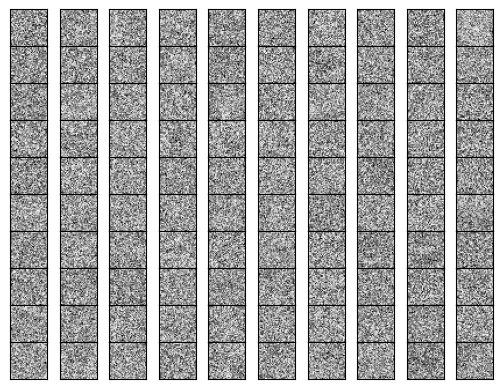

In [ ]:
fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

weights = model.layers[0].get_weights()

w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
    ax = plt.Subplot(fig, outer_grid[i])
    ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
    ax.set_xticks([])
    ax.set_yticks([])
    fig.add_subplot(ax)

plt.show()

# **Clustering**

170498071/170498071 [==============================] - 4s 0us/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


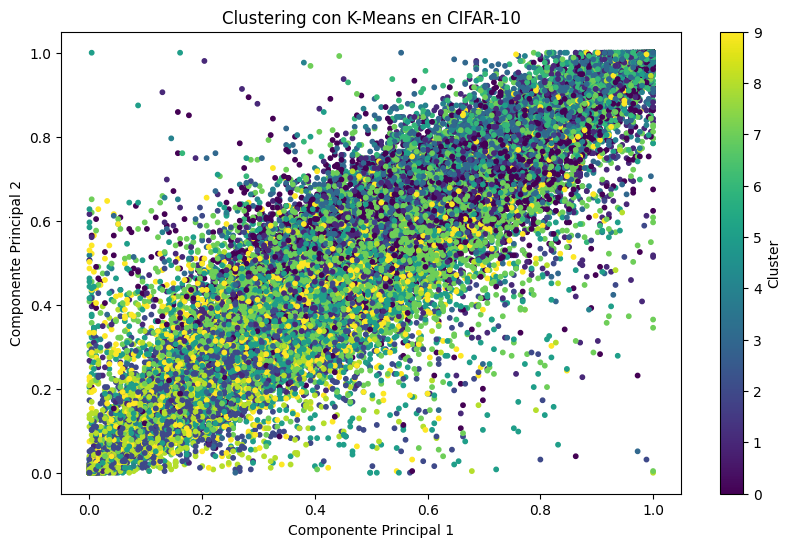

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Cargar el conjunto de datos CIFAR-10
from keras.datasets import cifar10

# Cargar CIFAR-10
(x_train, _), (_, _) = cifar10.load_data()

# Redimensionar y normalizar los datos
x_train = x_train.reshape((len(x_train), -1))
x_train = x_train.astype(float) / 255.

# Definir el modelo de clustering
pipeline = Pipeline([
    ("scaler", StandardScaler()),  # Escalar los datos
    ("pca", PCA(n_components=2)),  # Reducción de dimensionalidad
    ("kmeans", KMeans(n_clusters=10, random_state=42))  # Clustering con K-Means
])

# Ajustar el modelo al conjunto de datos
pipeline.fit(x_train)

# Obtener las etiquetas de los clusters
labels = pipeline.predict(x_train)

# Visualización de los clusters
plt.figure(figsize=(10, 6))
plt.scatter(x_train[:, 0], x_train[:, 1], c=labels, cmap='viridis', s=10)
plt.title('Clustering con K-Means en CIFAR-10')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()
